In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\siddu\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Wed Nov 13 15:22:02 2024).


<Axes: ylabel='job_skills'>

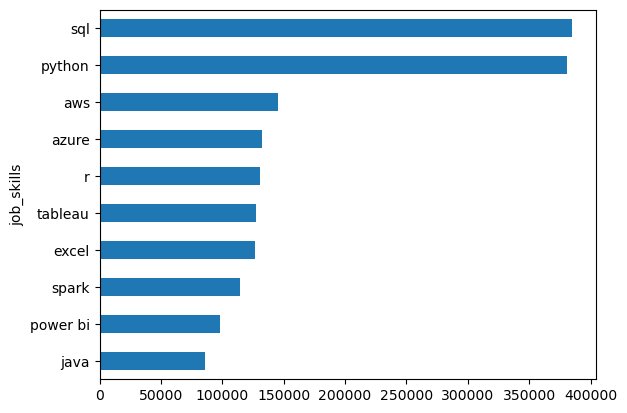

In [2]:
df_exploded=df.explode('job_skills')
df_exploded['job_skills'].value_counts().head(10).sort_values().plot(kind='barh')


In [3]:
df_exploded=df.explode('job_skills')

In [4]:
skills_counts=df_exploded.groupby(['job_title_short','job_skills']).size()
#type(skills_counts)
## Its in series lets convert it into data type


In [5]:
df_skills_counts=skills_counts.reset_index(name='skill_count')
df_skills_counts=df_skills_counts.sort_values(by='skill_count', ascending=False)
df_skills_counts


,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


<function matplotlib.pyplot.show(close=None, block=None)>

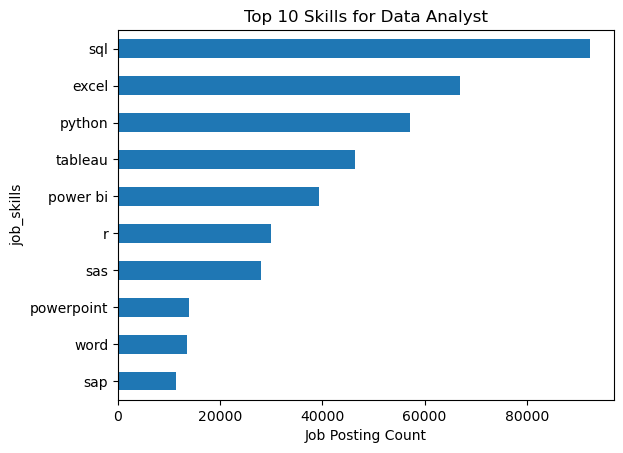

In [33]:
job_title='Data Analyst'
top_skills=10
df_skill_final=df_skills_counts[df_skills_counts['job_title_short']==job_title].head(top_skills)
## To sort the values we can do this below
# df_skill_final=df_skills_counts[df_skills_counts['job_title_short']==job_title].head(top_skills).sort_values(by='skill_count', ascending=True)
##or
df_skill_final.plot(kind='barh', x='job_skills',y='skill_count')
plt.gca().invert_yaxis()
## We can just look into any job_tile by changing the job_title variable
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.xlabel('Job Posting Count')
plt.legend().set_visible(False)
plt.show






